In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sample_data = pd.read_csv('AdSpent.csv')
sample_data

,Division,Calendar_Week,Paid_Views,Organic_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Overall_Views,Sales
0,A,1/6/2018,392,422,408,3.498950e+05,73580,12072,682,59417
1,A,1/13/2018,787,904,110,5.062702e+05,11804,9499,853,56806
2,A,1/20/2018,81,970,742,4.300422e+05,52232,17048,759,48715
3,A,1/27/2018,25,575,65,4.177457e+05,78640,10207,942,72047
4,A,2/3/2018,565,284,295,4.085058e+05,40561,5834,658,56235
...,...,...,...,...,...,...,...,...,...,...
3046,Z,2/1/2020,29239,25311,622406,1.459071e+06,45026,12098,53667,82707
3047,Z,2/8/2020,26230,28031,624409,5.342505e+05,227070,9548,53665,84503
3048,Z,2/15/2020,24749,31281,439362,4.227182e+05,393685,9861,55561,147325
3049,Z,2/22/2020,20713,30356,464178,6.085799e+05,424676,10221,49221,111525


In [3]:
sample_data = sample_data.loc[:, ['Calendar_Week', 'Sales']]
sample_data

,Calendar_Week,Sales
0,1/6/2018,59417
1,1/13/2018,56806
2,1/20/2018,48715
3,1/27/2018,72047
4,2/3/2018,56235
...,...,...
3046,2/1/2020,82707
3047,2/8/2020,84503
3048,2/15/2020,147325
3049,2/22/2020,111525


In [5]:
sample_data['Calendar_Week'] = pd.to_datetime(sample_data['Calendar_Week'])
sample_data 

,Calendar_Week,Sales
0,2018-01-06,59417
1,2018-01-13,56806
2,2018-01-20,48715
3,2018-01-27,72047
4,2018-02-03,56235
...,...,...
3046,2020-02-01,82707
3047,2020-02-08,84503
3048,2020-02-15,147325
3049,2020-02-22,111525


In [9]:
sample_data.index = sample_data['Calendar_Week']
sample_data.drop(labels='Calendar_Week', axis=1, inplace= True)
sample_data

,Sales
Calendar_Week,
2018-01-06,59417
2018-01-13,56806
2018-01-20,48715
2018-01-27,72047
2018-02-03,56235
...,...
2020-02-01,82707
2020-02-08,84503
2020-02-15,147325


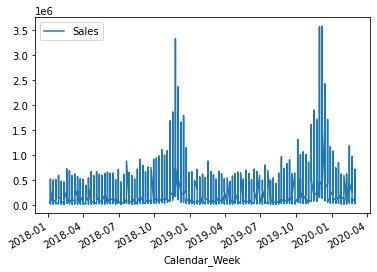

In [10]:
sample_data.plot()

* Here we can observe seasonal fluctuations, like more sales in the late december and early january, hence will use an additive model

In [11]:
# interval width sets the uncertainity interval to produce a condidence 
# interval around the forecast
model_1 = Prophet(interval_width=0.95)

In [15]:
# split to training and testing
training_data = sample_data[:'2020-01-31']
testing_data = sample_data['2020-02-01':]

In [16]:
model_1.fit(training_data)
future = model_1.make_future_dataframe(periods=33)
future.tail()

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.